In [1]:
import numpy as np
import cv2
from IPython.display import Image

## Original image

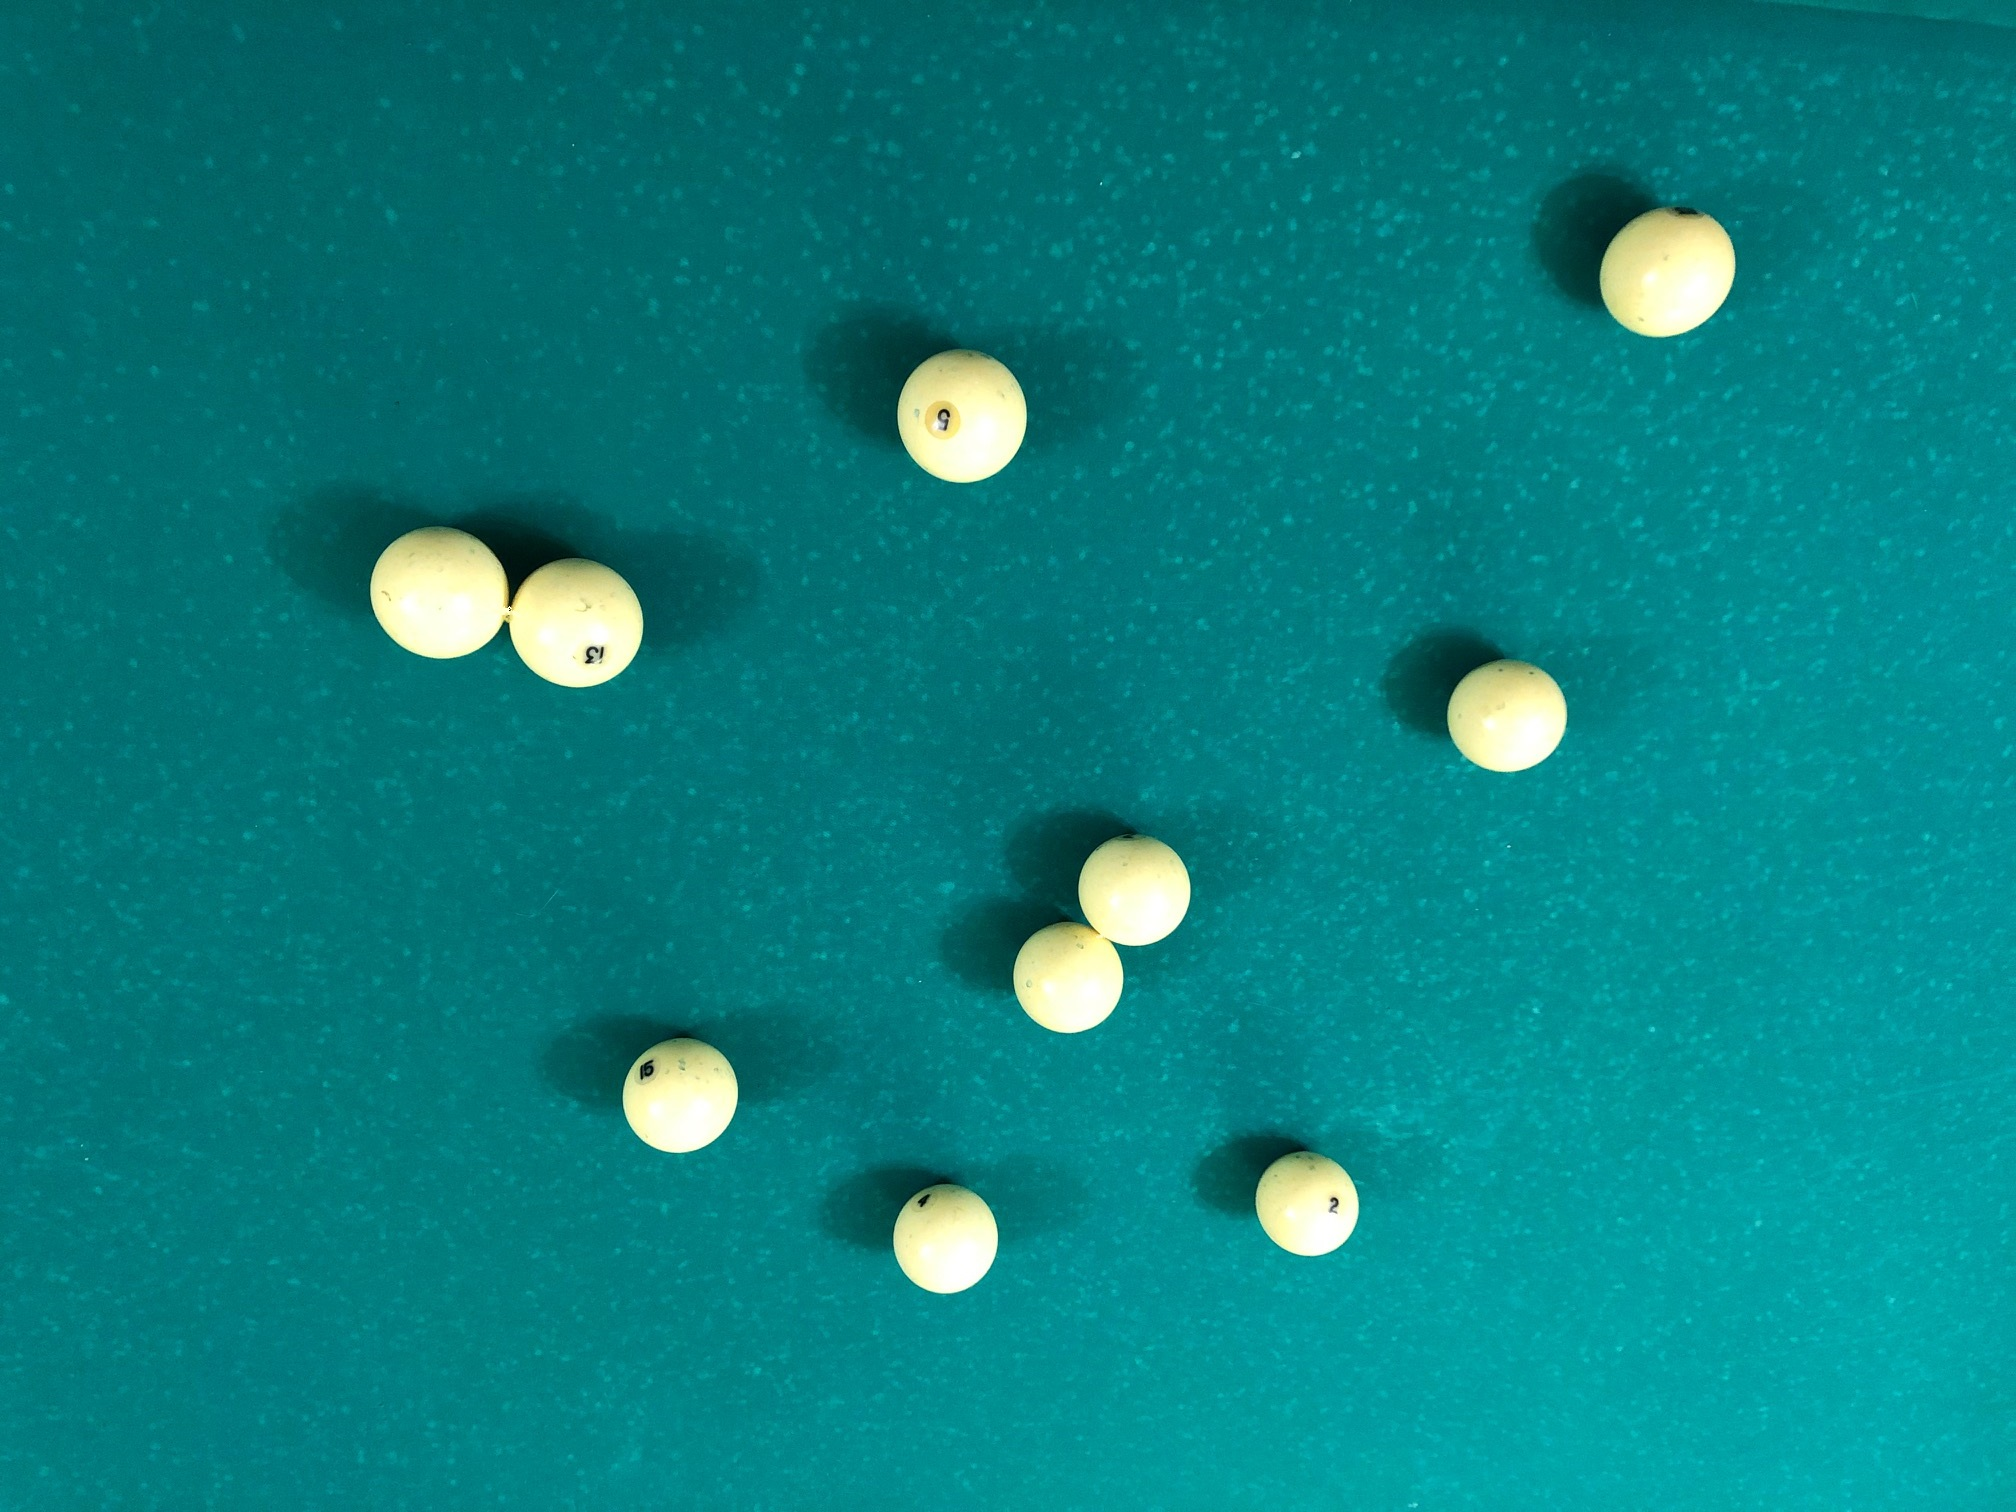

In [2]:
original_image_name = 'whiteballssample.jpg'
Image(original_image_name)

## Задача

- Реализовать алгоритм, автоматически считающий количество шаров на изображении
- Для этого выбрать порог и бинаризовать изображение
- Применить морфологические операции для удаления шума и “разлипания” шаров
- В заключение посчитать средний радиус шаров (в пикселях) и дисперсию этой величины

## Решение

In [3]:
def generate_filter(size):
    return np.array([[1 if pow((size // 2 - i) ** 2 + (size // 2 - j) ** 2, 1 / 2) < size // 2 else 0 for j in range(size)] for i in range(size)], dtype=np.uint8)

grayscale_image = cv2.imread(original_image_name, cv2.IMREAD_GRAYSCALE)

threshold = int(1.5 * np.median(grayscale_image))
binary_image = cv2.threshold(grayscale_image, threshold, 255, cv2.THRESH_BINARY)[1]
binary_image = cv2.erode(binary_image, generate_filter(25))
binary_image = cv2.dilate(binary_image, generate_filter(17))

contours, hierarchy = cv2.findContours(binary_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
hierarchy = hierarchy.reshape(hierarchy.shape[1:])

# Remove contours inside balls
outer_contours = []
for i, h in enumerate(hierarchy):
    if h[3] == -1:
        outer_contours.append(contours[i])

print('Balls number:', len(outer_contours))

radiuses = []
for contour in outer_contours:
    center = contour.mean(axis=0)
    radius = (((contour - center) ** 2).sum(axis=2) ** 0.5).mean(axis=0)
    radiuses.append(radius)
radiuses = np.array(radiuses)

print('Mean of ball radius:', radiuses.mean())
print('Variance of ball radius:', radiuses.std() ** 2)

Balls number: 10
Mean of ball radius: 53.09505769946456
Variance of ball radius: 36.632929313977186


## Filtered image

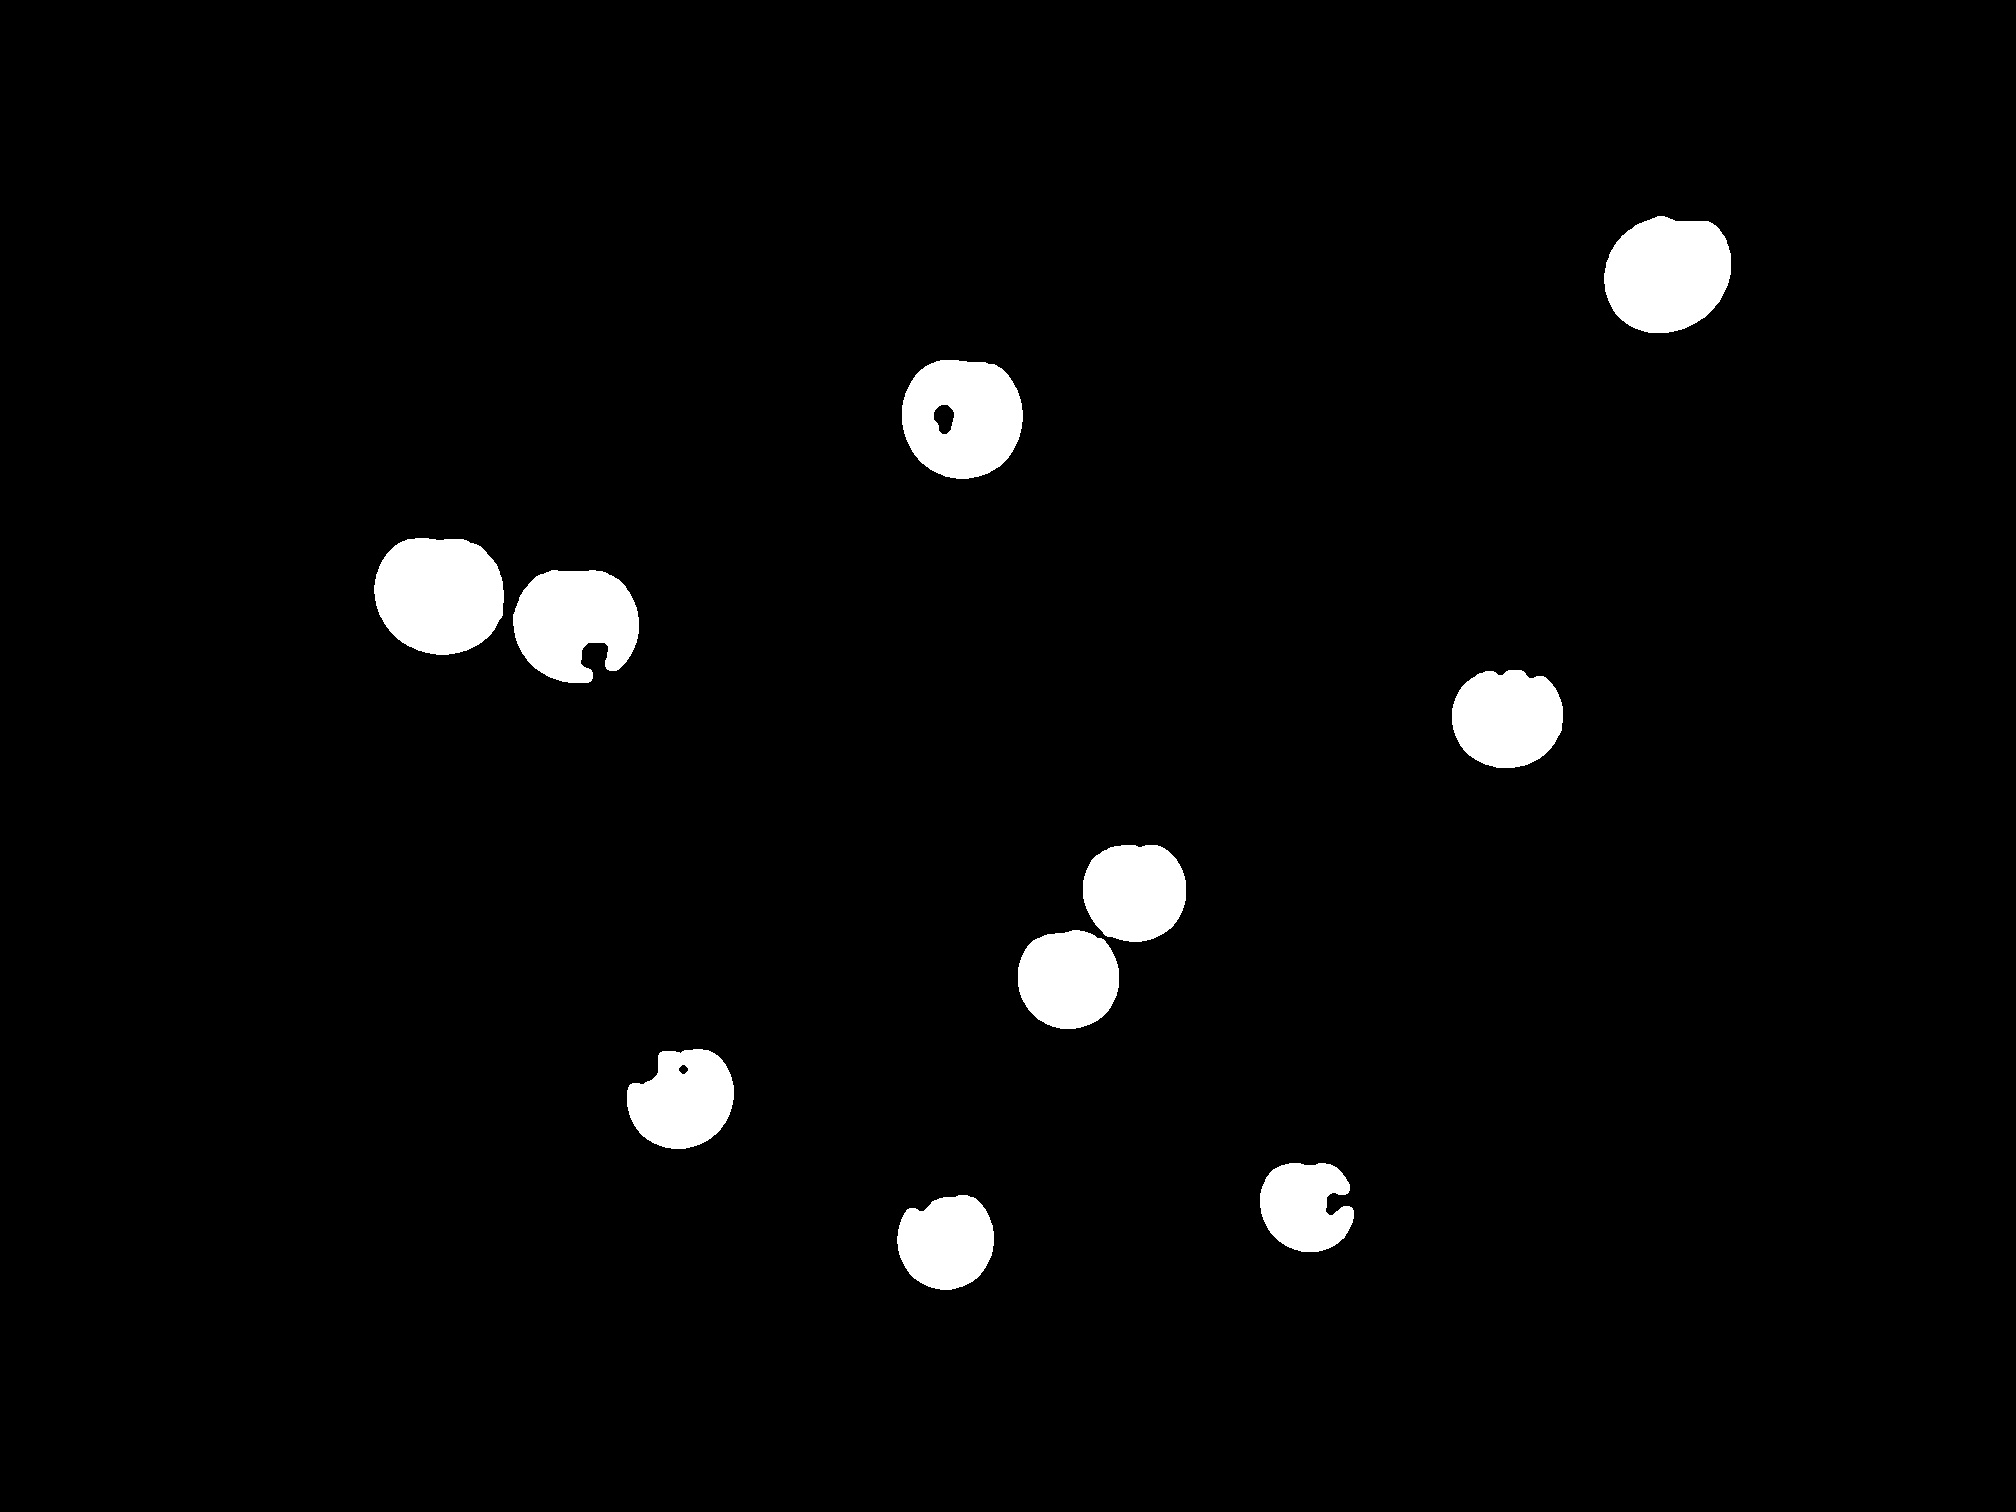

In [4]:
filtered_image_name = 'whiteballssample_task1.jpg'
cv2.imwrite(filtered_image_name, binary_image)
Image(filtered_image_name)